In [2]:
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import tensorflow as tf

samples = 1000

X, y = make_circles(samples,
                    noise=0.03,
                    random_state=10)

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})


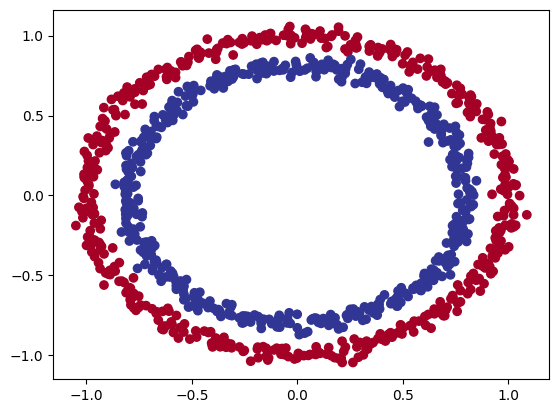

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu);

In [4]:
tf.random.set_seed(10)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_0.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_0.fit(X, y, epochs=200, verbose=0)
model_0.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4930 - loss: 8.0830 


[7.971191883087158, 0.5]

In [5]:
tf.random.set_seed(10)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])

model_1.fit(X, y, epochs = 100, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4732 - loss: 0.6931 


[0.6933426856994629, 0.46799999475479126]

In [6]:
import numpy as np

In [7]:
def plot_prediction_boundary(model, X, y):
  x_min, x_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred [0]) > 1:
    print("Doing Multiclass Classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing Binary Classification")
    y_pred= np.round(y_pred).reshape(xx.shape)

  plt.contour(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())





313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
Doing Binary Classification


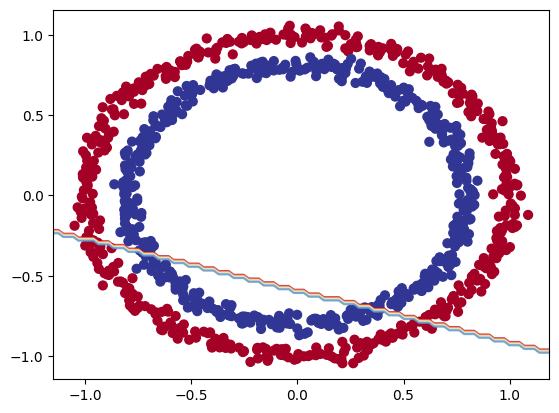

In [8]:
plot_prediction_boundary(model=model_1,
                         X=X,
                         y=y)

In [9]:
tf.random.set_seed(10)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

x_reg_train = tf.reshape(x_regression[:150], (-1,1))
x_reg_test = tf.reshape(x_regression[150:], (-1, 1))
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [10]:
model_linear = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_linear.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

model_linear.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 390.9693 - mae: 390.9693  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 258.6720 - mae: 258.6720 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 122.0891 - mae: 122.0891 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.3568 - mae: 59.3568 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.7964 - mae: 89.7964 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.9414 - mae: 63.9414 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.6065 - mae: 48.6065 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.0128 - mae: 54.0128 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45.1422 - mae: 45.1422 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.0531 - mae: 47.0531 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.3612 - mae: 43.3612 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.3761 - mae: 43.3761 
Epoch 13/100
5/5 ━

In [11]:
y_reg_preds = model_linear.predict(x_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


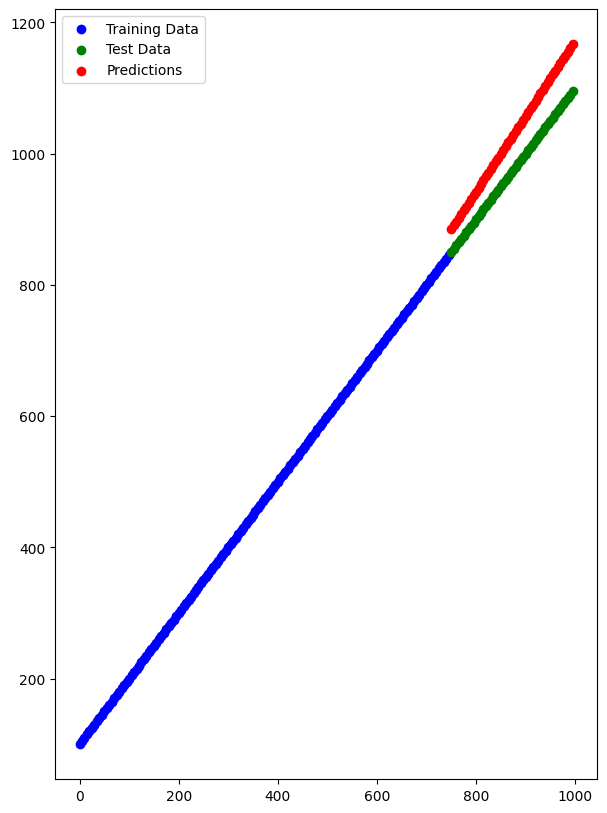

In [12]:
plt.figure(figsize=(7,10))
plt.scatter(x_reg_train, y_reg_train, c="b", label ="Training Data")
plt.scatter(x_reg_test, y_reg_test, c="g", label = "Test Data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [13]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
model_2.fit(X, y, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
Doing Binary Classification


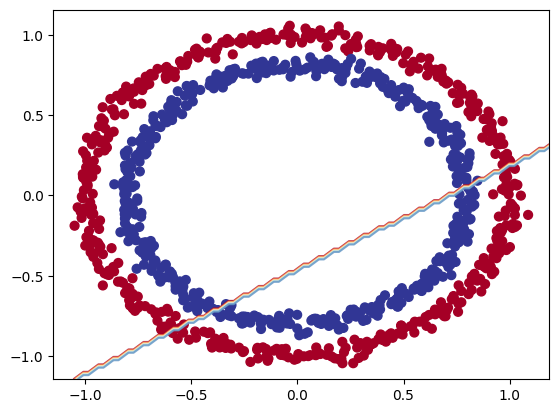

In [14]:
plot_prediction_boundary(model=model_2,
                         X=X,
                         y=y)

In [15]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step
Doing Binary Classification


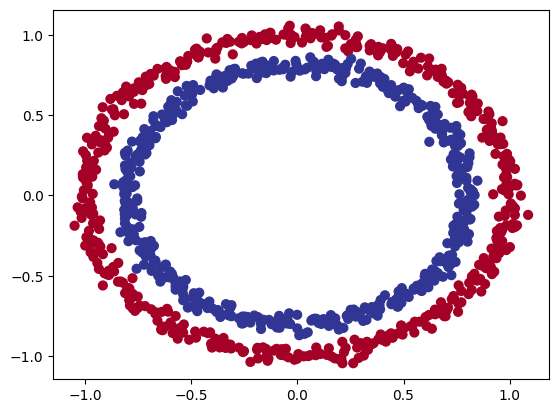

In [16]:
plot_prediction_boundary(model=model_3,
                         X=X,
                         y=y)


In [17]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5070 - loss: 7.9460  


[8.059049606323242, 0.5]

In [18]:
tf.random.set_seed(10)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "tanh"),
    tf.keras.layers.Dense(50, activation="tanh"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

model_4.fit(X, y, epochs=100, verbose=0)


In [19]:
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0038  


[0.004959112498909235, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
Doing Binary Classification


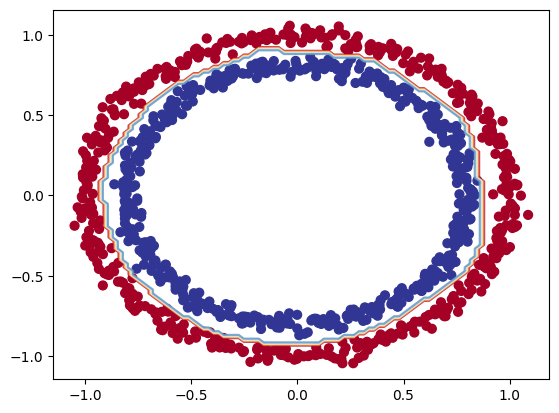

In [20]:
plot_prediction_boundary(model=model_4,
                         X=X,
                         y=y)

In [21]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]



In [22]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history= model_5.fit(X_train, y_train, epochs=100, verbose=0)


In [23]:
model_5.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.8360e-04


[0.0007467595278285444, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
Doing Binary Classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
Doing Binary Classification


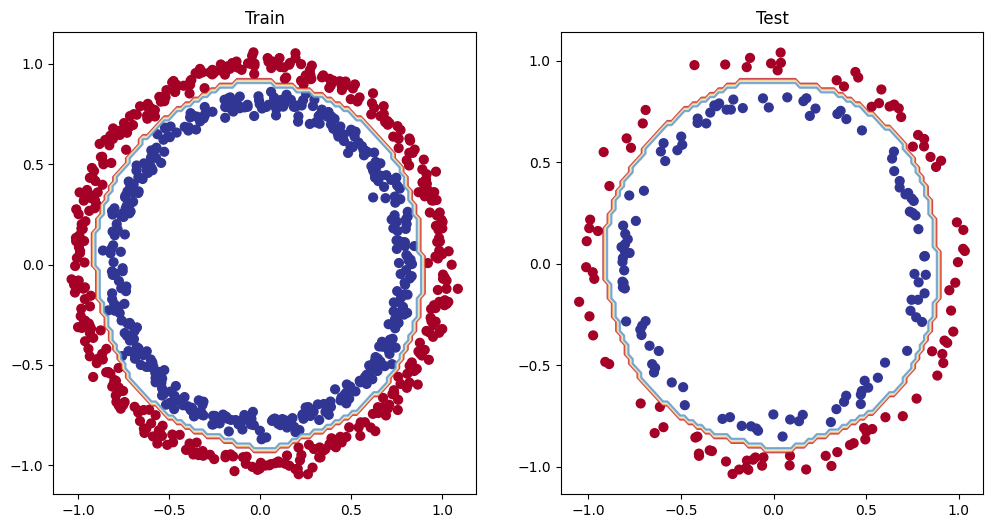

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_prediction_boundary(model=model_5,X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_prediction_boundary(model=model_5, X=X_test, y=y_test)
plt.show();

In [25]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.49500,0.687763
1,0.64875,0.648321
2,0.76875,0.545818
3,0.87875,0.370488
4,0.96750,0.184868
...,...,...
95,0.99500,0.011459
96,1.00000,0.004918
97,1.00000,0.002131
98,1.00000,0.003099


<Axes: >

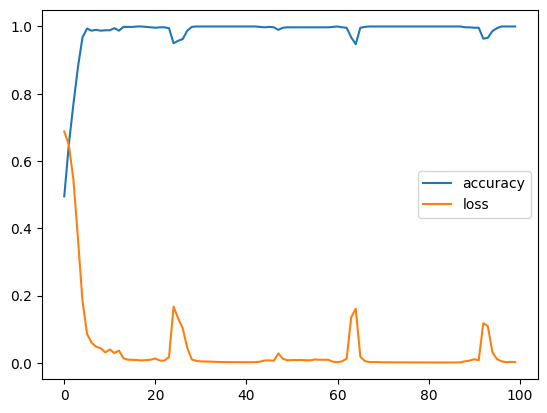

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_6= model_6.fit(X_train,
                       y_train,
                       epochs=100,
                       callbacks=[lr_schedular])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5054 - loss: 0.7214 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5102 - loss: 0.7205 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5117 - loss: 0.7197 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 0.7188 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 0.7179 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.7169 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4989 - loss: 0.7159 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4950 - loss: 0.7148 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 0.7138 - learning_

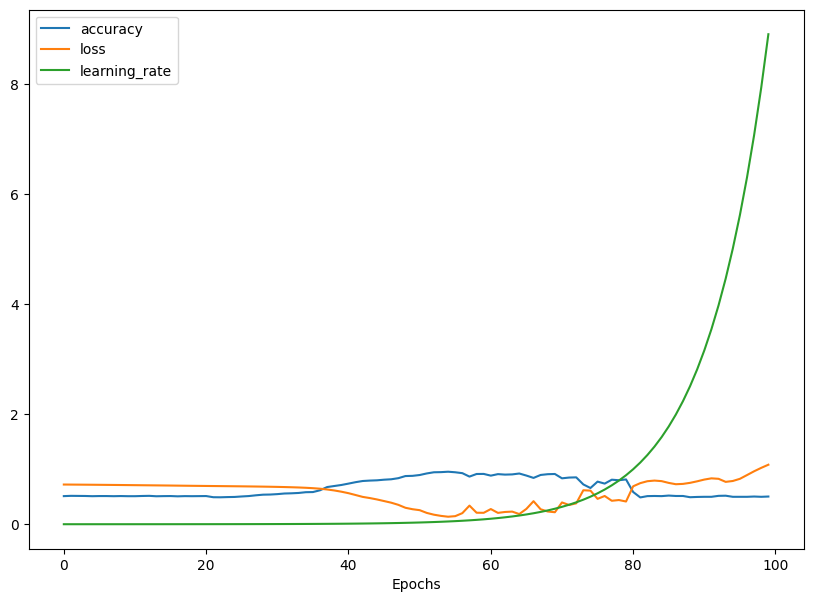

In [28]:
pd.DataFrame(history_6.history).plot(figsize=(10,7), xlabel="Epochs");

In [48]:
%cd /content
!rm -rf classification-model-practice
!git clone https://github.com/AttaabManzil/classification-model-practice.git
# Copy the notebook from your mounted Drive into the repo folder
!cp "/content/drive/MyDrive/Colab Notebooks/02_Classiciaction_Pytorch.ipynb" classification-model-practice/

# Go into the repo folder
%cd classification-model-practice/

# Create the main branch (since the repo is empty)
!git checkout -b main

# Add the notebook file
!git add .

# Commit it with a message
!git commit -m "Add initial notebook from Colab"

# Push to GitHub (you'll be prompted for your token)
from getpass import getpass
token = getpass("Enter your GitHub Personal Access Token: ")

remote = f"https://{token}@github.com/AttaabManzil/classification-model-practice.git"
!git push -u {remote} main


/content
Cloning into 'classification-model-practice'...
/content/classification-model-practice
Switched to a new branch 'main'
[main (root-commit) 910f997] Add initial notebook from Colab
 1 file changed, 1 insertion(+)
 create mode 100644 02_Classiciaction_Pytorch.ipynb
Enter your GitHub Personal Access Token: ··········
Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 604.41 KiB | 15.50 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/sec